<a href="https://colab.research.google.com/github/mashdas/Deep_Learning_101/blob/master/HumanORHorse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
##pulling the dataset..look into GAN to create your own dataset

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

In [0]:
#unzipping the data
!unzip '/tmp/horse-or-human.zip'

In [0]:
##moving ze data to a central warehouse
!mkdir horse-or-human
!mv horses ./horse-or-human
!mv humans ./horse-or-human

In [0]:
##Checking out the filenames..idk why
# Directory with our training horse pictures
import os
train_horse_dir = os.path.join("/content/horse-or-human/horses")

# Directory with our training human pictures
train_human_dir = os.path.join('/content/horse-or-human/humans')


In [9]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse17-2.png', 'horse35-4.png', 'horse43-7.png', 'horse46-5.png', 'horse13-7.png', 'horse04-2.png', 'horse02-7.png', 'horse28-1.png', 'horse17-1.png', 'horse50-9.png']
['human06-10.png', 'human14-28.png', 'human12-16.png', 'human13-30.png', 'human17-00.png', 'human14-00.png', 'human01-17.png', 'human07-03.png', 'human08-13.png', 'human17-13.png']


In [11]:
##Horses  
len(os.listdir(train_horse_dir))

500

In [14]:
#Humans
len(os.listdir(train_human_dir))

527

In [17]:
##Preprocessing the data using ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

d_path="/content/horse-or-human/"

train_datagen=ImageDataGenerator(rescale=1/255.0)

train_generator=train_datagen.flow_from_directory(d_path,target_size=(300,300),batch_size=128,class_mode="binary")


Found 1027 images belonging to 2 classes.


In [0]:
##Building the neural Network
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

model=Sequential()
model.add(Conv2D(16,(3,3),activation="relu",input_shape=(300,300,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 128)      

In [0]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [23]:
history = model.fit(train_generator,steps_per_epoch=8,  epochs=15,verbose=1)

Epoch 1/15
8/8 [==============================] - 70s 9s/step - loss: 1.2653 - accuracy: 0.5106
Epoch 2/15
8/8 [==============================] - 67s 8s/step - loss: 0.7240 - accuracy: 0.5873
Epoch 3/15
8/8 [==============================] - 79s 10s/step - loss: 0.7154 - accuracy: 0.6607
Epoch 4/15
8/8 [==============================] - 67s 8s/step - loss: 1.8931 - accuracy: 0.7186
Epoch 5/15
8/8 [==============================] - 67s 8s/step - loss: 0.4101 - accuracy: 0.9021
Epoch 6/15
8/8 [==============================] - 67s 8s/step - loss: 0.1747 - accuracy: 0.9255
Epoch 7/15
8/8 [==============================] - 68s 8s/step - loss: 0.1422 - accuracy: 0.9410
Epoch 8/15
8/8 [==============================] - 70s 9s/step - loss: 0.1636 - accuracy: 0.9344
Epoch 9/15
8/8 [==============================] - 79s 10s/step - loss: 0.3891 - accuracy: 0.8788
Epoch 10/15
8/8 [==============================] - 68s 9s/step - loss: 0.1000 - accuracy: 0.9633
Epoch 11/15
8/8 [====================

In [27]:
##Testing the model
from google.colab import files
from keras.preprocessing import image
import numpy as np
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving pagalchawla.jpg to pagalchawla (2).jpg
Saving sundar_chawla.jpg to sundar_chawla.jpg
[0.]
pagalchawla.jpg is a horse
[1.]
sundar_chawla.jpg is a human


In [0]:
##Images as they pass through convnet layers
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


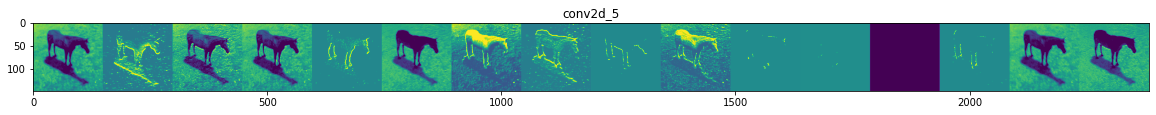

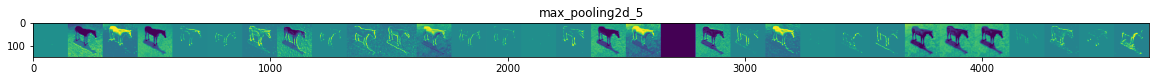

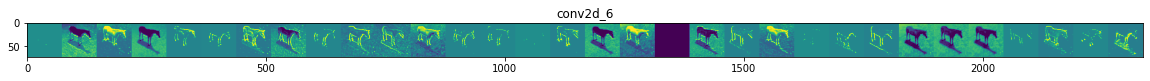

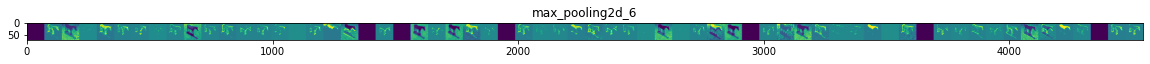

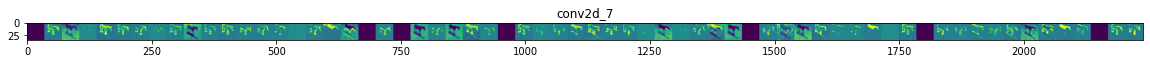

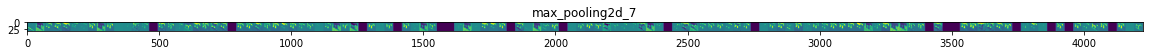

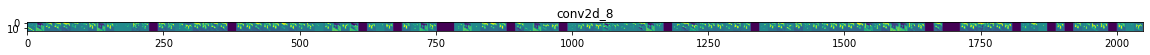

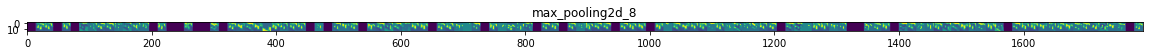

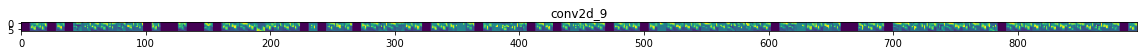

In [68]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [0]:
##Checking out grayscale vs rgb images

In [99]:
##Playing with input image dimensions for clarification
stuff = files.upload()

for fn in stuff.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(12,8))
  
  x = image.img_to_array(img)

Saving g_scale.jpg to g_scale (5).jpg


In [100]:
x.shape

(12, 8, 3)

In [101]:
x

array([[[101., 101., 101.],
        [111., 111., 111.],
        [114., 114., 114.],
        [112., 112., 112.],
        [111., 111., 111.],
        [103., 103., 103.],
        [ 86.,  86.,  86.],
        [ 69.,  69.,  69.]],

       [[107., 107., 107.],
        [118., 118., 118.],
        [122., 122., 122.],
        [251., 251., 251.],
        [255., 255., 255.],
        [134., 134., 134.],
        [ 94.,  94.,  94.],
        [ 80.,  80.,  80.]],

       [[106., 106., 106.],
        [122., 122., 122.],
        [254., 254., 254.],
        [248., 248., 248.],
        [252., 252., 252.],
        [252., 252., 252.],
        [251., 251., 251.],
        [ 84.,  84.,  84.]],

       [[113., 113., 113.],
        [249., 249., 249.],
        [124., 124., 124.],
        [213., 213., 213.],
        [217., 217., 217.],
        [235., 235., 235.],
        [248., 248., 248.],
        [ 97.,  97.,  97.]],

       [[128., 128., 128.],
        [187., 187., 187.],
        [126., 126., 126.],
        [184

In [0]:
x=np.expand_dims(x,axis=0)

In [103]:
x

array([[[[101., 101., 101.],
         [111., 111., 111.],
         [114., 114., 114.],
         [112., 112., 112.],
         [111., 111., 111.],
         [103., 103., 103.],
         [ 86.,  86.,  86.],
         [ 69.,  69.,  69.]],

        [[107., 107., 107.],
         [118., 118., 118.],
         [122., 122., 122.],
         [251., 251., 251.],
         [255., 255., 255.],
         [134., 134., 134.],
         [ 94.,  94.,  94.],
         [ 80.,  80.,  80.]],

        [[106., 106., 106.],
         [122., 122., 122.],
         [254., 254., 254.],
         [248., 248., 248.],
         [252., 252., 252.],
         [252., 252., 252.],
         [251., 251., 251.],
         [ 84.,  84.,  84.]],

        [[113., 113., 113.],
         [249., 249., 249.],
         [124., 124., 124.],
         [213., 213., 213.],
         [217., 217., 217.],
         [235., 235., 235.],
         [248., 248., 248.],
         [ 97.,  97.,  97.]],

        [[128., 128., 128.],
         [187., 187., 187.],
      

In [105]:
x.shape##in our case we would want it to be (1,300,300,3)

(1, 12, 8, 3)